Import packacges.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport sherlock
from sherlock import Sherlock
from sherlock.RBF import bases
from sherlock.utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('./example_data/slambench_orbslam2.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

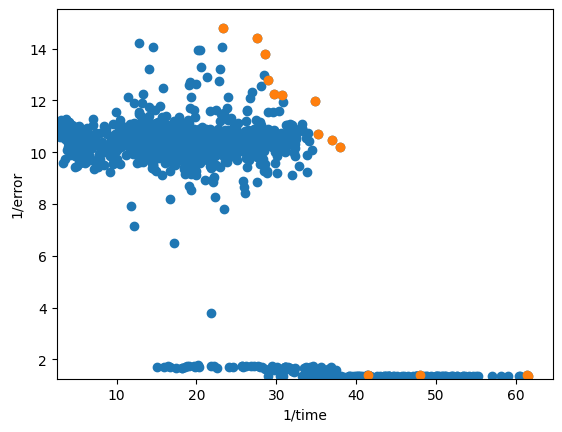

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0007114004995685027


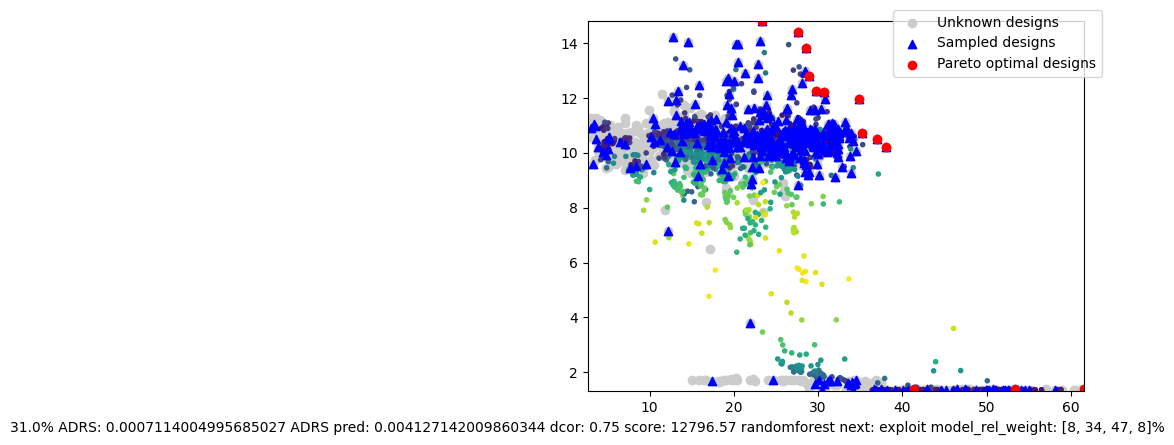

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.31),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([   0,  408,  816,    1,  409, 1223,  411,  417,  465,  513,  419,
        467,  563,  470,  683,  443,  755,  758,  350, 1031, 1213,  746,
        749,  753,  779,  434,  695,  761,  719,  659,  296,  347,  446,
        752,  997,  713,  410,  717,  311,  647,  527,  770,  593,  794,
        575,  785,  806,  482,  449,  491,  512,  994,  344,  744,  536,
        776,  767,  645,  704,  287,  702,  991, 1127,  584,  718,  703,
        174,  766,  764,  762,  440,  535,  773,  797,  768,   35,  632,
        680,  356, 1172,  353, 1219,  556,  597,  712,  743,  530,  309,
        102,  694,  967,  341,  550,  560,  380,  526,  646,  551,  167,
        809,  397,  800,  788,  711,  803,  782,  689,  756,  635,  638,
        626,  623,  674,  464,  416,  479,  458,  641,  750,  812,  656,
        239,  650,  722, 1030,  886,  386,  431,  401,   71,  478,  477,
        693,  473,   56, 1027, 1003,   69,  425,  463,  429,  887,  462,
       1190, 1126,  515,  430,  362,  665,  388,  4